In [ ]:
# Install necessary libraries for web scraping and data processing
!pip install beautifulSoup4 # Library for parsing HTML
!pip install requests       # Library for making HTTP requests

In [1]:
# Import required libraries for HTTP requests, file handling, and JSON parsing
import requests
import os
import json

# Function to download audio files for each chapter from the website using the dynamic url of source
# Arguments:
# - api_key: API key for accessing the Faith Comes By Hearing database
# - book_id: ID of the book (like "Mat" for Matthew)
# - chapter_id: Chapter number in the book
def download_audio(api_key, book_id, chapter_id):
   # Construct the API URL for the specified book and chapter
    url = f"https://dbt.io/api/bibles/filesets/TELDPIN1DA?key={api_key}&v=4&book_id={book_id}&chapter_id={chapter_id}&type=audio"
    response = requests.get(url)

    if response.status_code == 200:
        try:
          # Extract the data from the API response
            data = response.json().get("data", [])
            if not data:
                print(f"No data found for {book_id} Chapter {chapter_id}. Response: {response.json()}")
                return False
            # Get the audio file URL from the API response
            audio_url = data[0].get("path")
            if not audio_url:
                print(f"No audio URL found for {book_id} Chapter {chapter_id}. Response: {response.json()}")
                return False
            # Download the audio file and save it to the appropriate folder
            audio_response = requests.get(audio_url, stream=True)
            if audio_response.status_code == 200:
                os.makedirs(f"audio_files/{book_id}", exist_ok=True)
                file_name = f"audio_files/{book_id}/Chapter_{chapter_id}.mp3"
                with open(file_name, "wb") as audio_file:
                    for chunk in audio_response.iter_content(chunk_size=1024):
                        audio_file.write(chunk)
                print(f"Downloaded: {file_name}")
                return True
            else:
                print(f"Failed to download audio for {book_id} Chapter {chapter_id}. Audio response status: {audio_response.status_code}")
                return False
        except json.JSONDecodeError as e:
            print(f"JSON parsing error for {book_id} Chapter {chapter_id}: {e}")
            return False
    else:
        print(f"API request failed for {book_id} Chapter {chapter_id}. Status: {response.status_code}, Response: {response.text}")
        return False
# Dictionary mapping books to the number of chapters they contain
books_and_chapters = {
    "Mat": 28,
    "Mark": 16,
    "Luke": 24,
    "John": 21,
    "Acts": 28,
    "Rom": 16,
    "1Cor": 16,
    "2Cor": 13,
    "Gal": 6,
    "Eph": 6,
    "Php": 4,
    "Col": 4,
    "1Thess": 5,
    "2Thess": 3,
    "1Tim": 6,
    "2Tim": 4,
    "Titus": 3,
    "Phil": 1,
    "Heb": 13,
    "Jas": 5,
    "1Pet": 5,
    "2Pet": 3,
    "1John": 5,
    "2John": 1,
    "3John": 1,
    "Jude": 1,
    "Rev": 22
}


api_key = "a06351bd-4cae-40e7-90ec-ffdd13506987"

# Loop through all books and their chapters
for book_id, chapter_count in books_and_chapters.items():
    for chapter_id in range(1,chapter_count + 1):
        download_audio(api_key, book_id, chapter_id)

#Downloads all 260 chpaters from the new testament of my mother tongue "Telugu" without any fails as I mapped the book names and chapters correctly

Downloaded: audio_files/Mat/Chapter_1.mp3
Downloaded: audio_files/Mat/Chapter_2.mp3
Downloaded: audio_files/Mat/Chapter_3.mp3
Downloaded: audio_files/Mat/Chapter_4.mp3
Downloaded: audio_files/Mat/Chapter_5.mp3
Downloaded: audio_files/Mat/Chapter_6.mp3
Downloaded: audio_files/Mat/Chapter_7.mp3
Downloaded: audio_files/Mat/Chapter_8.mp3
Downloaded: audio_files/Mat/Chapter_9.mp3
Downloaded: audio_files/Mat/Chapter_10.mp3
Downloaded: audio_files/Mat/Chapter_11.mp3
Downloaded: audio_files/Mat/Chapter_12.mp3
Downloaded: audio_files/Mat/Chapter_13.mp3
Downloaded: audio_files/Mat/Chapter_14.mp3
Downloaded: audio_files/Mat/Chapter_15.mp3
Downloaded: audio_files/Mat/Chapter_16.mp3
Downloaded: audio_files/Mat/Chapter_17.mp3
Downloaded: audio_files/Mat/Chapter_18.mp3
Downloaded: audio_files/Mat/Chapter_19.mp3
Downloaded: audio_files/Mat/Chapter_20.mp3
Downloaded: audio_files/Mat/Chapter_21.mp3
Downloaded: audio_files/Mat/Chapter_22.mp3
Downloaded: audio_files/Mat/Chapter_23.mp3
Downloaded: audio_fi

In [2]:
import os
import requests
from bs4 import BeautifulSoup

#base URL and takes book and chapter arguements to generate URL for specific chapter
base_url = 'https://live.bible.is/bible/TELDPI/{book}/{chapter}'
book_chapters = {
    "Mat": 28,
    "Mark": 16,
    "Luke": 24,
    "John": 21,
    "Acts": 28,
    "Rom": 16,
    "1Cor": 16,
    "2Cor": 13,
    "Gal": 6,
    "Eph": 6,
    "Php": 4,
    "Col": 4,
    "1Thess": 5,
    "2Thess": 3,
    "1Tim": 6,
    "2Tim": 4,
    "Titus": 3,
    "Phil": 1,
    "Heb": 13,
    "Jas": 5,
    "1Pet": 5,
    "2Pet": 3,
    "1John": 5,
    "2John": 1,
    "3John": 1,
    "Jude": 1,
    "Rev": 22
}

# Function to extract and clean the text for each chapter
def extract_clean_text(soup):
    full_text = ""

    # Find all the <span> elements with the class 'align-left' (containing the verses)
    verses = soup.find_all('span', class_='align-left')

    for verse in verses:
        # Remove <sup> tags (verse numbers)
        #As we want only text and not numbers of the verse, removing those tags
        for sup_tag in verse.find_all('sup'):
            sup_tag.decompose()  # This removes the <sup> tag entirely

        # Extract and clean the text from the remaining span element
        verse_text = verse.get_text(strip=True)

        if verse_text:  # Add text only if it's not empty
            full_text += verse_text + " "

    # Return the full text as a single string
    # In the databse, it containes the text like chunks mentioneing verse numbers. So, we removed verse numbers before and now joined the all verses to make it look like a paragraph.
    return full_text.strip()

# Function to save the chapter text in a file
def save_chapter_text(book, chapter, text):
    # Create a folder for the book if it doesn't exist
    book_folder = f'bible_chapters/{book}'
    os.makedirs(book_folder, exist_ok=True)

    # Create the file name for the chapter
    file_name = f"{book}Chapter{chapter}.txt"
    file_path = os.path.join(book_folder, file_name)

    # Write the text to the file
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(f"Book: {book}\nChapter: {chapter}\n\n")
        file.write(text)

    print(f"Saved: {file_path}")

# Loop through each book and chapter
for book, chapters in book_chapters.items():
    for chapter in range(1, chapters + 1):
        # Construct the URL for the current book and chapter
        url = base_url.format(book=book, chapter=chapter)

        # Send a GET request to retrieve the chapter HTML
        response = requests.get(url)


        soup = BeautifulSoup(response.text, 'html.parser')

            # Extract and clean the text for the chapter
        full_text = extract_clean_text(soup)

            # Save the chapter text to a file
        save_chapter_text(book, chapter, full_text)


#This downloads the text files of all 260 chapters with an extension of .txt without failure

Saved: bible_chapters/Mat/MatChapter1.txt
Saved: bible_chapters/Mat/MatChapter2.txt
Saved: bible_chapters/Mat/MatChapter3.txt
Saved: bible_chapters/Mat/MatChapter4.txt
Saved: bible_chapters/Mat/MatChapter5.txt
Saved: bible_chapters/Mat/MatChapter6.txt
Saved: bible_chapters/Mat/MatChapter7.txt
Saved: bible_chapters/Mat/MatChapter8.txt
Saved: bible_chapters/Mat/MatChapter9.txt
Saved: bible_chapters/Mat/MatChapter10.txt
Saved: bible_chapters/Mat/MatChapter11.txt
Saved: bible_chapters/Mat/MatChapter12.txt
Saved: bible_chapters/Mat/MatChapter13.txt
Saved: bible_chapters/Mat/MatChapter14.txt
Saved: bible_chapters/Mat/MatChapter15.txt
Saved: bible_chapters/Mat/MatChapter16.txt
Saved: bible_chapters/Mat/MatChapter17.txt
Saved: bible_chapters/Mat/MatChapter18.txt
Saved: bible_chapters/Mat/MatChapter19.txt
Saved: bible_chapters/Mat/MatChapter20.txt
Saved: bible_chapters/Mat/MatChapter21.txt
Saved: bible_chapters/Mat/MatChapter22.txt
Saved: bible_chapters/Mat/MatChapter23.txt
Saved: bible_chapter

In [3]:
import os
import shutil

# Paths to main folders
audio_dir = "/content/audio_files"
text_dir = "/content/bible_chapters"
output_dir = "/content/New_Testament"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Iterate over all books in the audio directory
for book in os.listdir(audio_dir):
    book_audio_path = os.path.join(audio_dir, book)
    book_text_path = os.path.join(text_dir, book)
    # Check if the book exists in both audio and text folders
    if os.path.isdir(book_audio_path) and os.path.isdir(book_text_path):
        # Create book folder in the output directory
        book_output_path = os.path.join(output_dir, book)
        os.makedirs(book_output_path, exist_ok=True)

        # Process chapters for the current book
        for chapter_audio_file in os.listdir(book_audio_path):
            if chapter_audio_file.endswith(".mp3"):
                chapter_name = os.path.splitext(chapter_audio_file)[0]  # Remove .mp3 extension

                # Map audio chapter name to text chapter name
                chapter_text_file = f"{book}Chapter{chapter_name.split('_')[-1]}.txt"  # Maps Chapter_1.mp3 -> 1CorChapter1.txt

                chapter_audio_path = os.path.join(book_audio_path, chapter_audio_file)
                chapter_text_path = os.path.join(book_text_path, chapter_text_file)

                # Ensure the corresponding text file exists
                if os.path.exists(chapter_text_path):
                    # Create a chapter folder
                    chapter_output_path = os.path.join(book_output_path, chapter_name)
                    os.makedirs(chapter_output_path, exist_ok=True)

                    # Copy audio and text files into the chapter folder
                    shutil.copy(chapter_audio_path, os.path.join(chapter_output_path, "audio.mp3"))
                    shutil.copy(chapter_text_path, os.path.join(chapter_output_path, "text.txt"))

                else:
                    print(f"  Missing text file for: {book}/{chapter_name}")
    else:
        print(f"Book folder missing in text or audio directories: {book}")

print("\nReorganization complete!")


"""This reorganizes the directory. As there are separate folders for audio files and text files, it will make a main directory called 'New_Testament'. The structure of directory is:
New_Testament
├── Book1
│   ├── Chapter1
│   │   ├── audio.mp3
│   │   └── text.txt
│   └── Chapter2
│       ├── audio.mp3
│       └── text.txt
└── Book2
    ├── Chapter1
    │   ├── audio.mp3
    │   └── text.txt
    └── Chapter2
        ├── audio.mp3
        └── text.txt
"""




Reorganization complete!


In [4]:
!pip install pydub  #To compute audio duration

In [6]:
import os
from pydub.utils import mediainfo
import pandas as pd

# Path to the main New Testament directory
base_folder = "/content/New_Testament"

# List to store chapter-level statistics
chapter_stats = []

# Iterate over books in the New Testament
for book in sorted(os.listdir(base_folder)):
    book_path = os.path.join(base_folder, book)

    if os.path.isdir(book_path):
        # Process each chapter folder
        for chapter_folder in sorted(os.listdir(book_path)):
            chapter_path = os.path.join(book_path, chapter_folder)

            if os.path.isdir(chapter_path):
                # Define file paths
                audio_file_path = os.path.join(chapter_path, "audio.mp3")
                text_file_path = os.path.join(chapter_path, "text.txt")

                # Compute audio duration
                try:
                    info = mediainfo(audio_file_path)
                    duration = float(info['duration'])  # Duration in seconds
                except Exception as e:
                    print(f"Error reading audio file {audio_file_path}: {e}")
                    duration = None

                # Compute word count
                try:
                    with open(text_file_path, 'r', encoding='utf-8') as f:
                        text = f.read()
                        word_count = len(text.split())
                except Exception as e:
                    print(f"Error reading text file {text_file_path}: {e}")
                    word_count = None

                # Calculate words per second (WPS)
                if duration and word_count:
                    wps = word_count / duration
                else:
                    wps = None

                # Append to the stats list
                chapter_stats.append({
                    "Book": book,
                    "Chapter": chapter_folder,
                    "Audio Duration (s)": duration,
                    "Word Count": word_count,
                    "Words Per Second (WPS)": wps
                })

# Convert the list to a DataFrame
df_stats = pd.DataFrame(chapter_stats)

# Save as a CSV file
output_csv = "/content/New_Testament_Chapter_Stats.csv"
df_stats.to_csv(output_csv, index=False)

print(f"Chapter-level statistics saved to {output_csv}")

# Display the DataFrame
df_stats

Chapter-level statistics saved to /content/New_Testament_Chapter_Stats.csv


,Book,Chapter,Audio Duration (s),Word Count,Words Per Second (WPS)
0,1Cor,Chapter_1,267.040,424,1.587777
1,1Cor,Chapter_10,288.712,450,1.558647
2,1Cor,Chapter_11,295.096,477,1.616423
3,1Cor,Chapter_12,264.976,401,1.513345
4,1Cor,Chapter_13,126.232,173,1.370492
...,...,...,...,...,...
255,Rom,Chapter_8,381.184,559,1.466483
256,Rom,Chapter_9,323.008,471,1.458168
257,Titus,Chapter_1,186.904,274,1.465993
258,Titus,Chapter_2,153.184,211,1.377428


In [7]:
summary_stats = df_stats.describe()
print(summary_stats)

       Audio Duration (s)   Word Count  Words Per Second (WPS)
count          260.000000   260.000000              260.000000
mean           295.675692   464.365385                1.553743
std            110.156900   190.930785                0.119442
min            115.936000   161.000000                1.187029
25%            208.906000   322.750000                1.477218
50%            278.548000   422.500000                1.556898
75%            362.092000   575.500000                1.635907
max            687.040000  1130.000000                1.857408


                        Audio Duration (s)  Word Count  Words Per Second (WPS)
Audio Duration (s)                1.000000    0.984323                0.378528
Word Count                        0.984323    1.000000                0.525730
Words Per Second (WPS)            0.378528    0.525730                1.000000


<Axes: >

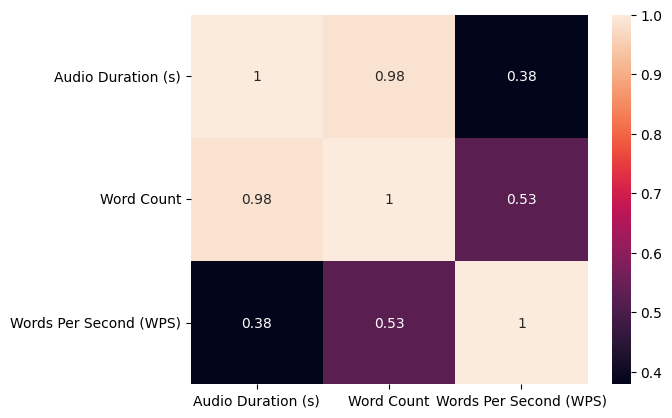

In [8]:
import seaborn as sns
correlation = df_stats[['Audio Duration (s)', 'Word Count', 'Words Per Second (WPS)']].corr()
print(correlation)

sns.heatmap(correlation,annot=True)

#The heatmap describing the correlation of Audio Duration, Word Count and Word Per Second.

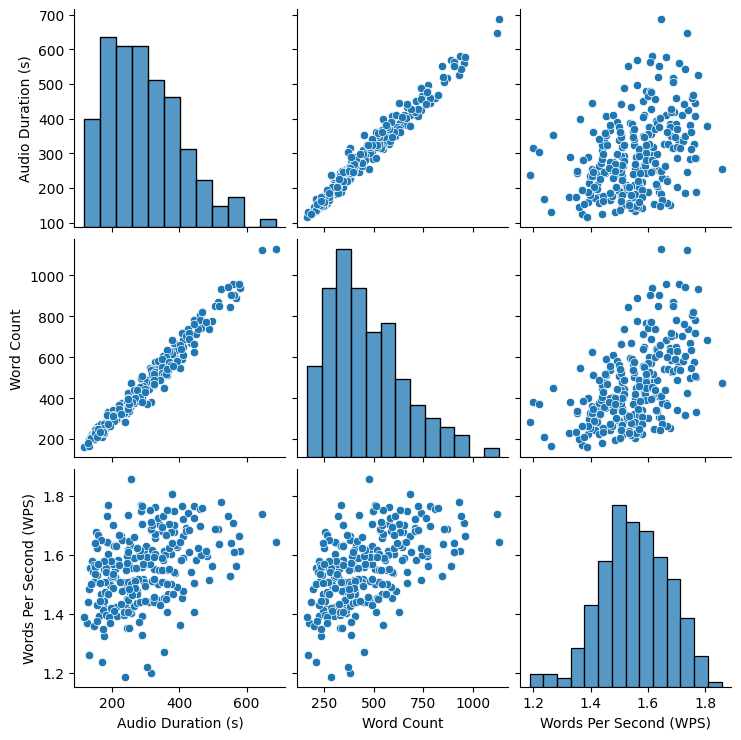

In [9]:
sns.pairplot(df_stats[['Audio Duration (s)', 'Word Count', 'Words Per Second (WPS)']])

In [10]:
df_stats.isnull().sum()  #Validating whether there are null values or not

,0
Book,0
Chapter,0
Audio Duration (s),0
Word Count,0
Words Per Second (WPS),0


In [11]:
print(df_stats[df_stats['Words Per Second (WPS)'] > 1.8])  # High speaking rate
print(df_stats[df_stats['Audio Duration (s)'] < 120])  # Very short chapters
print(df_stats[df_stats['Word Count'] > 1000])  # High word count

"""The chapters that have high speaking rate cannot be appropriate for TTS and SST applications because
human average conversational speaking rate is approximately 1.5.
so, exceeding 1.8 wps can lead to high error rates in STT and unnatural pacing in TTS"""

"""For the files that have less audio duration might be difficult to find the patterns in the TTS applications which can reduce training efficiency.
These audio files makes it difficult to accurately align the text with speech in STT applicatons."""

""" The files that have word count greater than 1000 may lead to difficulties to process long contexts with accurate intonation and stress
and cannot process shorter paragraphs as they were trained on longer texts with detailed information which makes it not suitable for STT and TTS applications."""

     Book     Chapter  Audio Duration (s)  Word Count  Words Per Second (WPS)
79   Acts  Chapter_25             254.656         473                1.857408
156  Luke  Chapter_19             377.848         682                1.804959
     Book    Chapter  Audio Duration (s)  Word Count  Words Per Second (WPS)
16  1John  Chapter_1             115.936         161                1.388697
     Book     Chapter  Audio Duration (s)  Word Count  Words Per Second (WPS)
175  Mark  Chapter_14              646.84        1124                1.737679
204   Mat  Chapter_26              687.04        1130                1.644737


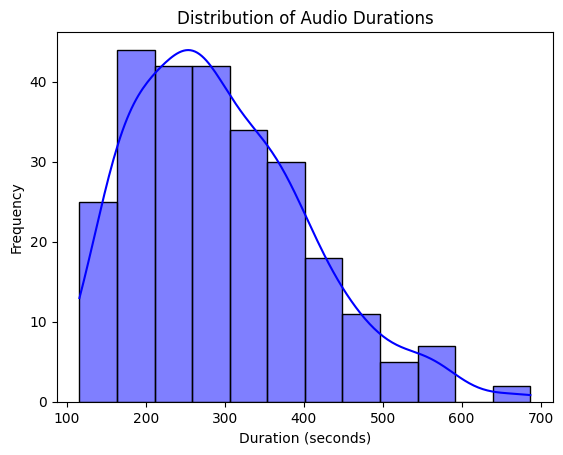

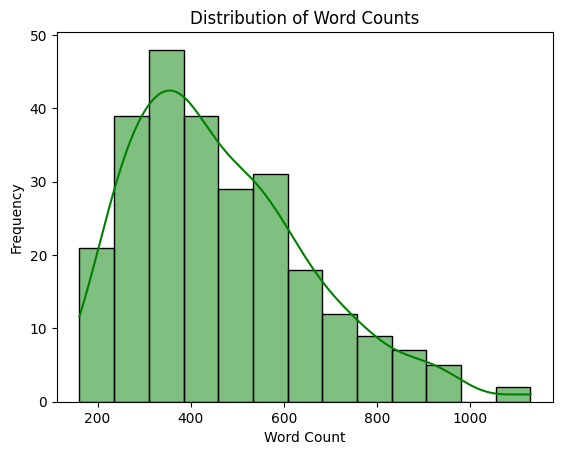

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Audio duration distribution
sns.histplot(df_stats['Audio Duration (s)'], kde=True, color='blue')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Word count distribution
sns.histplot(df_stats['Word Count'], kde=True, color='green')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

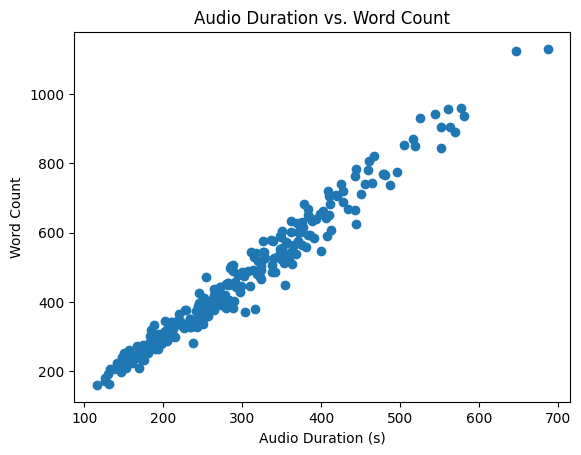

In [13]:
plt.scatter(df_stats['Audio Duration (s)'], df_stats['Word Count'])
plt.title('Audio Duration vs. Word Count')
plt.xlabel('Audio Duration (s)')
plt.ylabel('Word Count')
plt.show()

"""The following scatter plot shows that there two outliers that has high duration and word count.
These outlies make the things difficult to maintain the synthesis consistency in TTS applications.
and to maintain accuracy in the STT application due to its length."""

"""To deal with these outliers, use normalization method to bring them to the median values or remove them."""

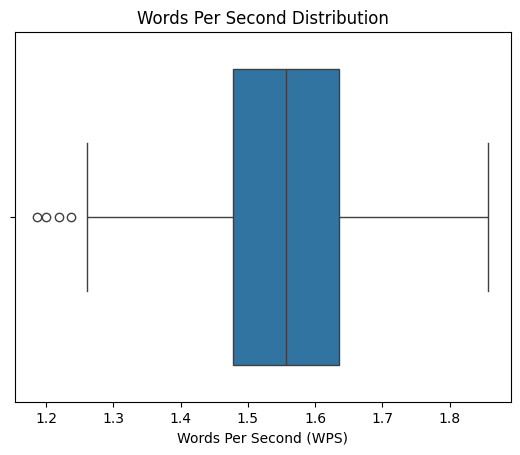

In [14]:
sns.boxplot(x=df_stats['Words Per Second (WPS)'])
plt.title('Words Per Second Distribution')
plt.show()

Text(0.5, 1.0, 'Audio Duration vs. Word Count')

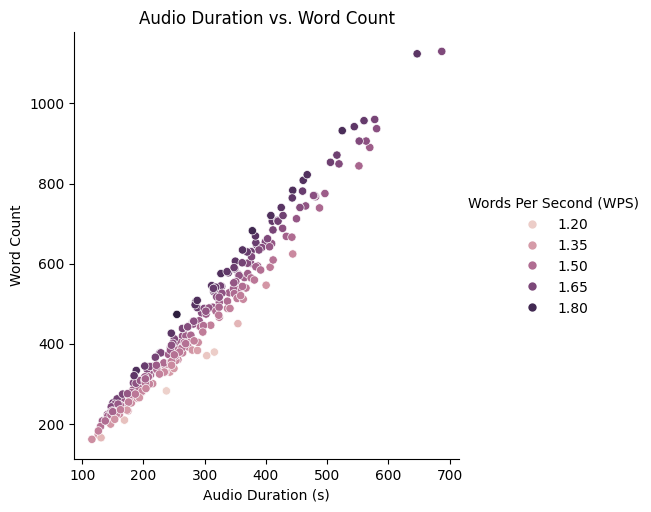

In [15]:
sns.relplot(x='Audio Duration (s)', y='Word Count', hue='Words Per Second (WPS)', data=df_stats)
plt.title('Audio Duration vs. Word Count')

Text(0.5, 1.0, 'Audio Duration vs. Word Count')

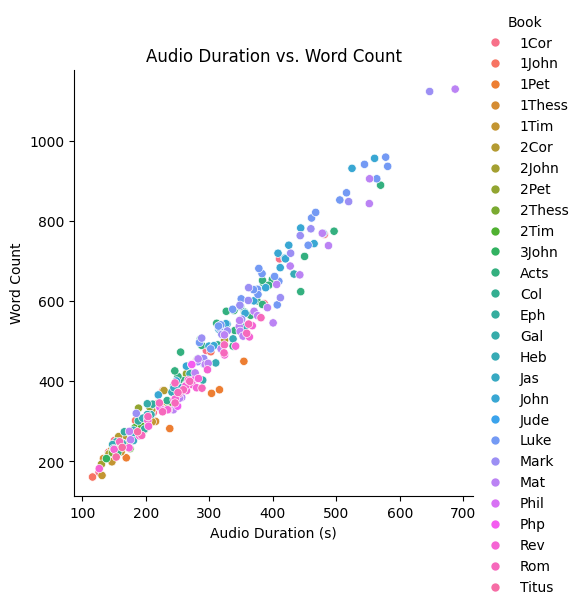

In [16]:
sns.relplot(x='Audio Duration (s)', y='Word Count', hue='Book', data=df_stats)
plt.title('Audio Duration vs. Word Count')

In [17]:
!pip install ydata-profiling
import pandas as pd
from pandas_profiling import ProfileReport
df=pd.read_csv('/content/New_Testament_Chapter_Stats.csv')
profile = ProfileReport(df, title="New Testament Profiling Report")
profile.to_file("New_Testament_Profiling_Report.html")

#This will create the report of analysis using the parameters of audio duration, word count and word per second.

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d6c4b965c835d5647406fc4929e16b4a4ec7b6c029d5b960630a22435272c246
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


<ipython-input-17-c202e22fb05d>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
!pip install textstat #Library used to calculate the readability score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.1 MB/s eta 0:00:00


In [19]:
import os
import librosa
import numpy as np
import pandas as pd
from textstat import flesch_reading_ease

# Path to organized New Testament data
NEW_TESTAMENT_PATH = "/content/New_Testament"

# Initialize results
results = []

# Analyze audio and text files
def process_chapter(audio_file, text_file, book, chapter):
    try:
        # Audio analysis
        y, sr = librosa.load(audio_file, sr=None)
        rms = np.sqrt(np.mean(y**2))  # RMS energy
        silence_fraction = np.sum(np.abs(y) < 0.01) / len(y)  # Silence fraction
        duration = librosa.get_duration(y=y, sr=sr)

        # Text analysis
        with open(text_file, "r") as f:
            text = f.read()
        readability = flesch_reading_ease(text)
        word_count = len(text.split())

        # WPS calculation
        wps = word_count / duration if duration > 0 else 0

        # Append results
        results.append({
            "Book": book,
            "Chapter": chapter,
            "Audio Duration (s)": duration,
            "RMS Energy": rms,
            "Silence Fraction": silence_fraction,
            "Word Count": word_count,
            "Readability Score": readability,
            "Words Per Second (WPS)": wps
        })

    except Exception as e:
        print(f"Error processing {book}/{chapter}: {e}")

# Loop through all books and chapters
for book in os.listdir(NEW_TESTAMENT_PATH):
    book_path = os.path.join(NEW_TESTAMENT_PATH, book)
    if os.path.isdir(book_path):
        for chapter in os.listdir(book_path):
            chapter_path = os.path.join(book_path, chapter)
            audio_file = os.path.join(chapter_path, "audio.mp3")
            text_file = os.path.join(chapter_path, "text.txt")
            process_chapter(audio_file, text_file, book, chapter)

# Save results to a CSV
df_results = pd.DataFrame(results)
df_results.to_csv("new_testament_analysis.csv", index=False)
print("Analysis saved to new_testament_analysis.csv")

"""This will crate a csv file containing the Root Mean Square Energy (RMS) energy that is a measure of loudness of an audio signal to evaluate the audio quality and consistency.
Silence fraction is calculated to find out the pauses in the audio to make it more reliable for the STT and TTS applications.
Readability score is calculated to find out the readability of the text.
"""

Analysis saved to new_testament_analysis.csv


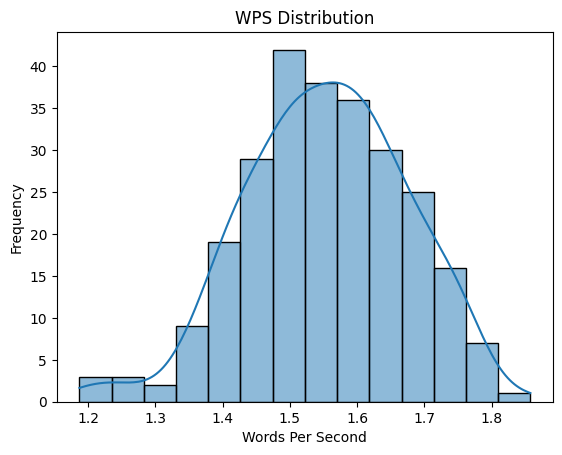

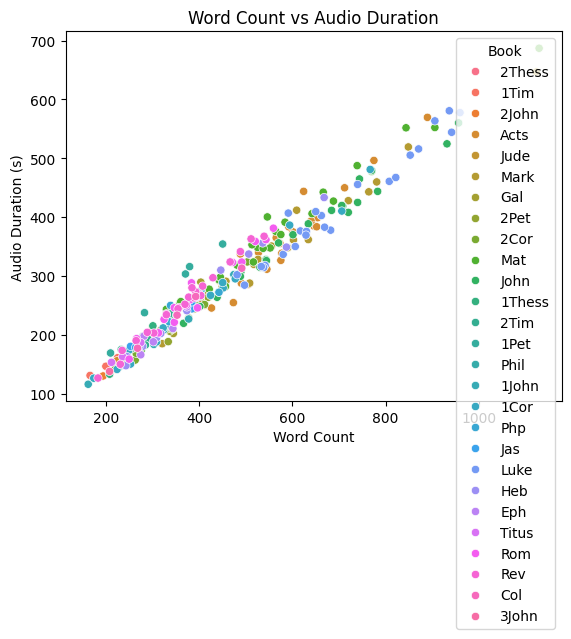

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv("new_testament_analysis.csv")

# Visualize WPS Distribution
sns.histplot(df["Words Per Second (WPS)"], kde=True)
plt.title("WPS Distribution")
plt.xlabel("Words Per Second")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of Word Count vs Audio Duration
sns.scatterplot(data=df, x="Word Count", y="Audio Duration (s)", hue="Book")
plt.title("Word Count vs Audio Duration")
plt.show()

In [ ]:
""" Key Performance indicators (KPIs):
The following metrics were analyzed to evaluate the dataset for TTS and STT applications:
Audio Duration (s): Chapters range from 126.48 to 687.024 seconds.
RMS Energy: Indicates loudness, ranging from 0.13 to 0.18.
Silence Fraction: Indicates silent portions in audio, ranging from 0.24 to 0.39.
Word Count: Indicates Text length ranges from 161 to 1130 words.
Readability Score: Complexity of the text mostly between 100 and 117.
Words Per Second (WPS): Reading speed ranges from 1.1 to 1.9.

Findings:
Audio Quality: Chapters with higher Silence Fractions have lower RMS Energy. It indicates potential quality issues.
Text Complexity: Higher readability scores correlate with slower WPS.
Alignment: Longer chapters show smaller WPS, it indicates the need for adjustments in pace for TTS models.

Challanges faced:
1. URLs are dynamic which was quite difficult to format and automate to save the audio files.
2. In the book names few has complete names as book ids but some other have only first 3 or 4 letters and some other are completely different like 'JAS' AND 'PHP'.
3. To find out the correct book names to avoid failure of downloading, had to search for its key and then by executing it in browser, knew the book ids.

Methodological Explanation:
Altought he URLs are dynamic, they are still embedded in HTML element for audio files. So using requests with beautifulsoup makes it efficient as there is no need for javascript rendering.
URLs contained json data, so to extract he relevant data, used json.